# Singularities formed by the focusing of cylindrical null fluids by Letelier & Wang
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 29, 2021 

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.49.5105

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,phi,z,du,dv,dphi,dz = symbols('u v phi z du dv dphi dz')

In [5]:
Omega = Function('Omega')(u,v)
Omega

In [6]:
h = Function('h')(u,v)
h

In [7]:
Phi = Function('Phi')(u,v)
Phi

In [9]:
variables = Matrix([u,v,z,phi])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [10]:
differentials = Matrix([du,dv,dz,dphi])
differentials 

⎡ du ⎤
⎢    ⎥
⎢ dv ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [11]:
lineElement =  expand( 2*du*dv*exp(-Omega) + exp(-h) * ( exp(-Phi) * dphi**2 - exp(Phi) * dz**2) ) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -Ω(u, v)                                          ⎤
⎢    0      ℯ                   0                    0         ⎥
⎢                                                              ⎥
⎢ -Ω(u, v)                                                     ⎥
⎢ℯ              0               0                    0         ⎥
⎢                                                              ⎥
⎢                        Φ(u, v)  -h(u, v)                     ⎥
⎢    0          0      -ℯ       ⋅ℯ                   0         ⎥
⎢                                                              ⎥
⎢                                            -Φ(u, v)  -h(u, v)⎥
⎣    0          0               0           ℯ        ⋅ℯ        ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡            -Ω(u, v)                                          ⎤
⎢    0      ℯ                   0                    0         ⎥
⎢                                                              ⎥
⎢ -Ω(u, v)                                                     ⎥
⎢ℯ              0               0                    0         ⎥
⎢                                                              ⎥
⎢                        Φ(u, v)  -h(u, v)                     ⎥
⎢    0          0      -ℯ       ⋅ℯ                   0         ⎥
⎢                                                              ⎥
⎢                                            -Φ(u, v)  -h(u, v)⎥
⎣    0          0               0           ℯ        ⋅ℯ        ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v phi z")
u,v,phi,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                        
⎢⎡ ∂                                                                                                                                 ⎤  ⎡
⎢⎢-──(Ω(u, v))  0                             0                                                         0                            ⎥  ⎢
⎢⎢ ∂u                                                                                                                                ⎥  ⎢
⎢⎢                                                                                                                                   ⎥  ⎢
⎢⎢     0        0                             0                                                         0                            ⎥  ⎢
⎢⎢                                                                                                                                   ⎥  ⎢
⎢⎢                 ⎛∂             

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                2                                                                         
⎢                                ⎛∂          ⎞    ⎛∂          ⎞                           ∂           ∂             ∂           ∂        
⎢                                ⎜──(Φ(u, v))⎟    ⎜──(h(u, v))⎟      2                    ──(Φ(u, v))⋅──(Φ(u, v))   ──(h(u, v))⋅──(h(u, v
⎢      ∂           ∂             ⎝∂u         ⎠    ⎝∂u         ⎠     ∂                     ∂u          ∂v            ∂u          ∂v       
⎢      ──(Ω(u, v))⋅──(h(u, v)) - ────────────── - ────────────── + ───(h(u, v))         - ─────────────────────── - ─────────────────────
⎢      ∂u          ∂u                  2                2            2                               2                         2         
⎢                                                                  ∂u                                                                    
⎢                                 

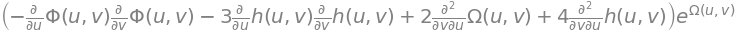

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                2                                                                               
⎢                          ⎛∂          ⎞    ⎛∂          ⎞                                                                                
⎢                          ⎜──(Φ(u, v))⎟    ⎜──(h(u, v))⎟      2                                                          2              
⎢∂           ∂             ⎝∂u         ⎠    ⎝∂u         ⎠     ∂                              ∂           ∂               ∂               
⎢──(Ω(u, v))⋅──(h(u, v)) - ────────────── - ────────────── + ───(h(u, v))                1.0⋅──(h(u, v))⋅──(h(u, v)) - ─────(h(u, v))    
⎢∂u          ∂u                  2                2            2                             ∂u          ∂v            ∂v ∂u             
⎢                                                            ∂u                                                                          
⎢                                 

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                2                                                                         
⎢                                ⎛∂          ⎞    ⎛∂          ⎞                           ∂           ∂             ∂           ∂        
⎢                                ⎜──(Φ(u, v))⎟    ⎜──(h(u, v))⎟      2                    ──(Φ(u, v))⋅──(Φ(u, v))   ──(h(u, v))⋅──(h(u, v
⎢      ∂           ∂             ⎝∂u         ⎠    ⎝∂u         ⎠     ∂                     ∂u          ∂v            ∂u          ∂v       
⎢      ──(Ω(u, v))⋅──(h(u, v)) - ────────────── - ────────────── + ───(h(u, v))         - ─────────────────────── - ─────────────────────
⎢      ∂u          ∂u                  2                2            2                               2                         2         
⎢                                                                  ∂u                                                                    
⎢                                 

In [25]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                2                                                                               
⎢                          ⎛∂          ⎞    ⎛∂          ⎞                                                                                
⎢                          ⎜──(Φ(u, v))⎟    ⎜──(h(u, v))⎟      2                                                          2              
⎢∂           ∂             ⎝∂u         ⎠    ⎝∂u         ⎠     ∂                              ∂           ∂               ∂               
⎢──(Ω(u, v))⋅──(h(u, v)) - ────────────── - ────────────── + ───(h(u, v))                1.0⋅──(h(u, v))⋅──(h(u, v)) - ─────(h(u, v))    
⎢∂u          ∂u                  2                2            2                             ∂u          ∂v            ∂v ∂u             
⎢                                                            ∂u                                                                          
⎢                                 

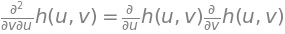

In [52]:
fieldEquation1 = Eq( diff(h,u,v) , solve( einsteinSimplified[1,0] , diff(h,u,v) )[0] ) 
fieldEquation1

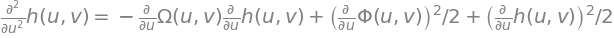

In [53]:
fieldEquation2 = Eq(diff(h,u,u), solve( einsteinSimplified[0,0] , diff(h,u,u) )[0] ) 
fieldEquation2

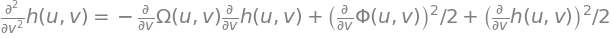

In [54]:
fieldEquation3 = Eq(diff(h,v,v), solve( einsteinSimplified[1,1] , diff(h,v,v) )[0] ) 
fieldEquation3

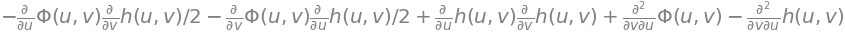

In [45]:
ricciSimplified[2,2].args[0]

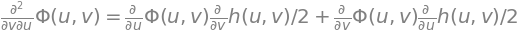

In [51]:
fieldEquation5 = Eq(diff(Phi,u,v), solve( ( ricciSimplified[3,3].args[0] + ricciSimplified[2,2].args[0] ) , diff(Phi,u,v) )[0] )
fieldEquation5

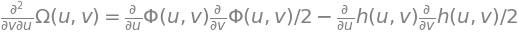

In [65]:
fieldEquation4 = Eq(diff(Omega,u,v) , solve(  simplify( einsteinSimplified[2,2].args[0] + einsteinSimplified[3,3].args[1] ).subs(fieldEquation5.args[0],fieldEquation5.args[1]).subs(fieldEquation1.args[0],fieldEquation1.args[1]) , diff(Omega,u,v))[0] )
fieldEquation4

In [67]:
vacuumFieldEquations = Matrix([fieldEquation1,fieldEquation2,fieldEquation3,fieldEquation4,fieldEquation5])
vacuumFieldEquations

⎡                    2                                                     ⎤
⎢                   ∂              ∂           ∂                           ⎥
⎢                 ─────(h(u, v)) = ──(h(u, v))⋅──(h(u, v))                 ⎥
⎢                 ∂v ∂u            ∂u          ∂v                          ⎥
⎢                                                                          ⎥
⎢                                                        2                2⎥
⎢                                           ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢  2                                        ⎜──(Φ(u, v))⎟    ⎜──(h(u, v))⎟ ⎥
⎢ ∂               ∂           ∂             ⎝∂u         ⎠    ⎝∂u         ⎠ ⎥
⎢───(h(u, v)) = - ──(Ω(u, v))⋅──(h(u, v)) + ────────────── + ──────────────⎥
⎢  2              ∂u          ∂u                  2                2       ⎥
⎢∂u                                                                        ⎥
⎢                                                                          ⎥